In [1]:
# from scipy import stats
import pandas as pd
import numpy as np

In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
from main import scraper

In [3]:
url = "https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/ssangyong/tivoli/"

In [4]:
items = scraper(url, pagination_limit=15)

[main] [INFO] [23-Aug-20 23:59:18] - Scraping [https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/ssangyong/tivoli/]
[main] [DEBUG] [23-Aug-20 23:59:19] - {'brand': 'SsangYong', 'model': 'Tivoli', 'net_id': 'CL-AD-10182687', 'price': '8590000', 'state': 'Valparaíso', 'seller_type': 'Particular', 'year': '2018', 'odometer': '47.000 km', 'transmission': 'Automática', 'fuel_type': 'Bencina', 'fuel_economy': '12,7 Kms/Lt.'}
[main] [DEBUG] [23-Aug-20 23:59:19] - {'brand': 'SsangYong', 'model': 'Tivoli', 'net_id': 'CL-AD-8627537', 'price': '8790000', 'state': 'Bío Bío', 'seller_type': 'Automotora Usado', 'year': '2016', 'odometer': '61.600 km', 'transmission': 'Manual', 'fuel_type': 'Diesel'}
[main] [DEBUG] [23-Aug-20 23:59:19] - {'brand': 'SsangYong', 'model': 'Tivoli', 'net_id': 'CL-AD-8739942', 'price': '9900000', 'state': 'Metropolitana de Santiago', 'seller_type': 'Automotora Usado', 'year': '2017', 'odometer': '34.900 km', 'transmission': 'Automática', 'fuel_type': 'Diesel'}
[main

In [6]:
df = pd.DataFrame(items)

In [7]:
df.head()

,brand,model,net_id,price,state,seller_type,year,odometer,transmission,fuel_type,fuel_economy
0,SsangYong,Tivoli,CL-AD-10182687,8590000,Valparaíso,Particular,2018,47.000 km,Automática,Bencina,"12,7 Kms/Lt."
1,SsangYong,Tivoli,CL-AD-8627537,8790000,Bío Bío,Automotora Usado,2016,61.600 km,Manual,Diesel,NaN
2,SsangYong,Tivoli,CL-AD-8739942,9900000,Metropolitana de Santiago,Automotora Usado,2017,34.900 km,Automática,Diesel,NaN
3,SsangYong,Tivoli,CL-AD-8623424,6490000,Los Lagos,Automotora Usado,2015,92.546 km,Manual,Bencina,NaN
4,SsangYong,Tivoli,CL-AD-8589013,7990000,Bío Bío,Automotora Usado,2017,52.000 km,Manual,Bencina,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         30 non-null     object
 1   model         30 non-null     object
 2   net_id        30 non-null     object
 3   price         30 non-null     object
 4   state         30 non-null     object
 5   seller_type   30 non-null     object
 6   year          30 non-null     object
 7   odometer      29 non-null     object
 8   transmission  30 non-null     object
 9   fuel_type     30 non-null     object
 10  fuel_economy  7 non-null      object
dtypes: object(11)
memory usage: 2.7+ KB


In [17]:
df.odometer = df.odometer.str.replace('.', '').str.extract('(\d+)')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         30 non-null     object
 1   model         30 non-null     object
 2   net_id        30 non-null     object
 3   price         30 non-null     object
 4   state         30 non-null     object
 5   seller_type   30 non-null     object
 6   year          30 non-null     object
 7   odometer      29 non-null     object
 8   transmission  30 non-null     object
 9   fuel_type     30 non-null     object
 10  fuel_economy  7 non-null      object
dtypes: object(11)
memory usage: 2.7+ KB


In [22]:
df.odometer = pd.to_numeric(df.odometer, errors='coerce')
df.year = pd.to_numeric(df.year, errors='coerce')
df.price = pd.to_numeric(df.price, errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         30 non-null     object 
 1   model         30 non-null     object 
 2   net_id        30 non-null     object 
 3   price         30 non-null     int64  
 4   state         30 non-null     object 
 5   seller_type   30 non-null     object 
 6   year          30 non-null     int64  
 7   odometer      29 non-null     float64
 8   transmission  30 non-null     object 
 9   fuel_type     30 non-null     object 
 10  fuel_economy  7 non-null      object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.7+ KB


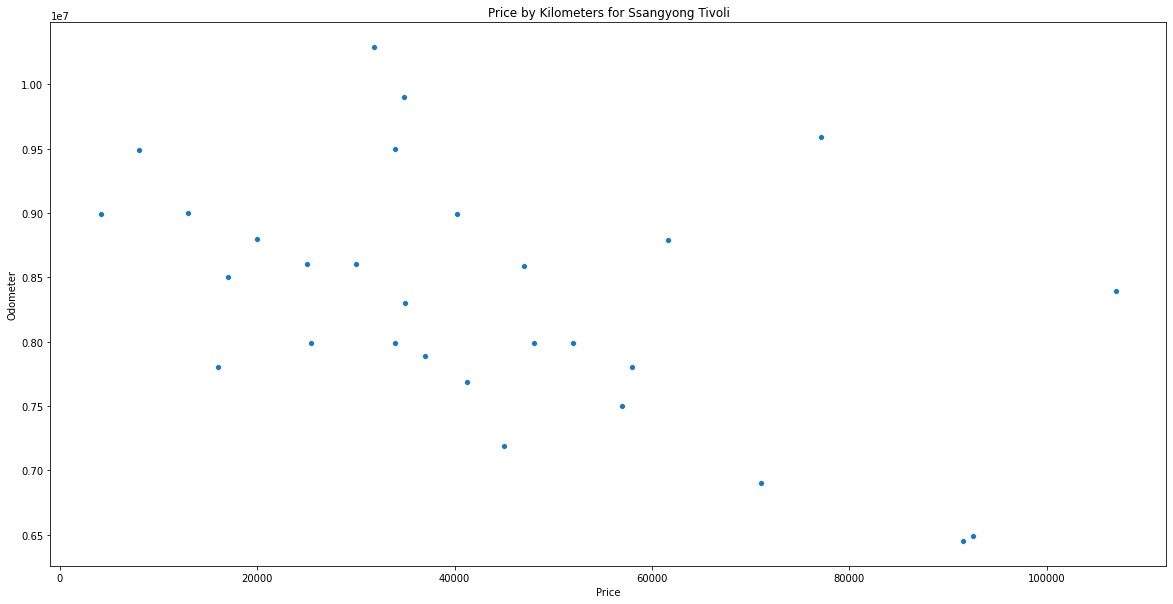

In [31]:
_ = plt.figure(figsize=(20, 10))
_ = sns.scatterplot(x=df.odometer, y=df.price)
_ = plt.xlabel('Price')
_ = plt.ylabel('Odometer')
_ = plt.title('Price by Kilometers for Ssangyong Tivoli')


In [32]:
url = "https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/ssangyong/korando/"
items = scraper(url, pagination_limit=50)

[main] [INFO] [24-Aug-20 00:23:52] - Scraping [https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/ssangyong/korando/]
[main] [INFO] [24-Aug-20 00:23:53] - Pagination - URL = [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/korando/?offset=12]
[main] [INFO] [24-Aug-20 00:23:53] - Scraping [https://www.chileautos.cl/vehiculos/autos-vehículo/ssangyong/korando/?offset=12]
[main] [DEBUG] [24-Aug-20 00:23:54] - {'brand': 'SsangYong', 'model': 'Korando', 'net_id': 'CL-AD-8614538', 'price': '6000000', 'state': 'Metropolitana de Santiago', 'seller_type': 'Automotora Usado', 'year': '2011', 'odometer': '96.769 km', 'transmission': 'Manual', 'fuel_type': 'Diesel'}
[main] [DEBUG] [24-Aug-20 00:23:54] - {'brand': 'SsangYong', 'model': 'Korando', 'net_id': 'CL-AD-8742964', 'price': '5990000', 'state': 'Metropolitana de Santiago', 'seller_type': 'Automotora Usado', 'year': '2013', 'odometer': '130.000 km', 'transmission': 'Manual', 'fuel_type': 'Diesel'}
[main] [DEBUG] [24-Aug-20 00

In [35]:
df = pd.DataFrame(items)

df.odometer = df.odometer.str.replace('.', '').str.extract('(\d+)')
df.odometer = pd.to_numeric(df.odometer, errors='coerce')
df.year = pd.to_numeric(df.year, errors='coerce')
df.price = pd.to_numeric(df.price, errors='coerce')


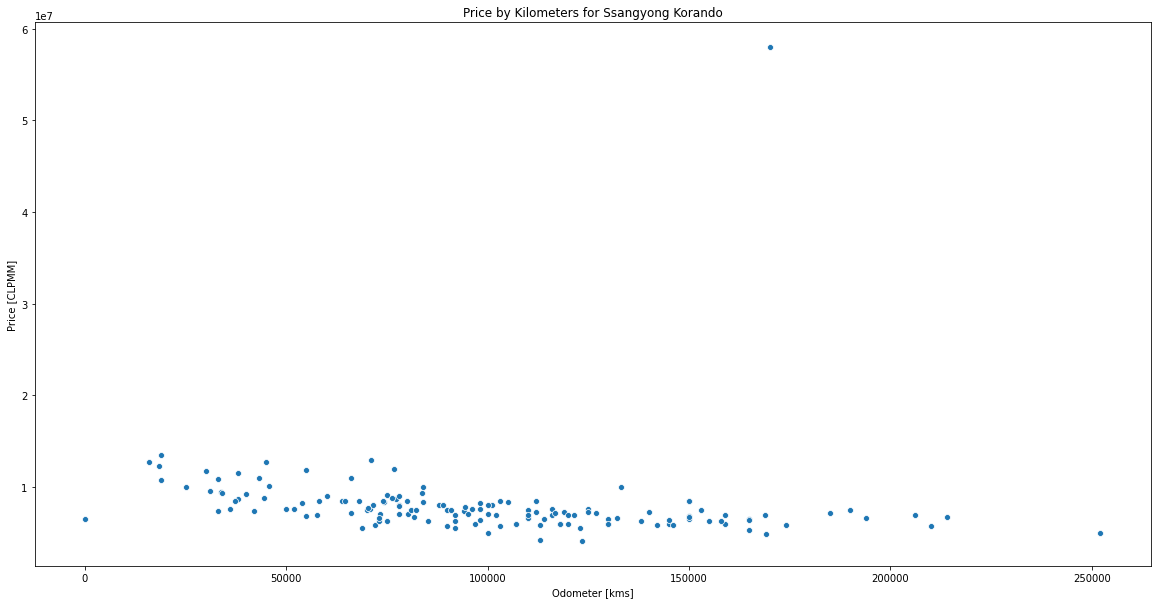

In [42]:
_ = plt.figure(figsize=(20, 10))
_ = sns.scatterplot(x=df.odometer, y=df.price)
_ = plt.xlabel("Odometer [kms]")
_ = plt.ylabel("Price [CLPMM]")
_ = plt.title('Price by Kilometers for Ssangyong Korando')

In [43]:
df = df.sort_values(by='price')

In [45]:
df = df.iloc[:-1]

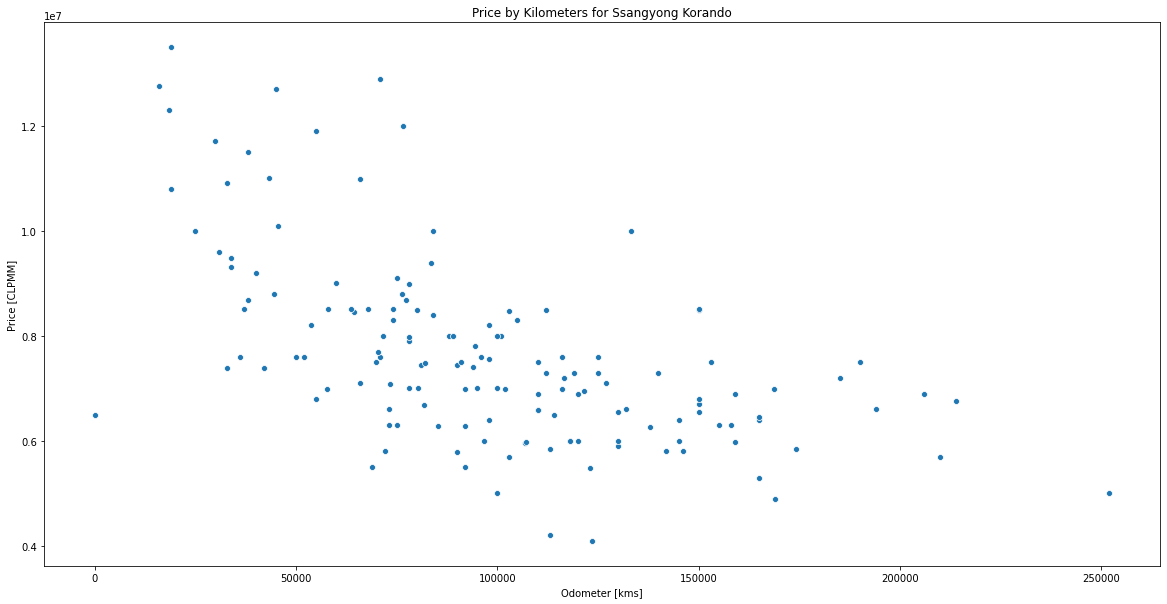

In [46]:
_ = plt.figure(figsize=(20, 10))
_ = sns.scatterplot(x=df.odometer, y=df.price)
_ = plt.xlabel("Odometer [kms]")
_ = plt.ylabel("Price [CLPMM]")
_ = plt.title('Price by Kilometers for Ssangyong Korando')

In [4]:
url = "https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/ssangyong/tivoli/"
items = scraper(url, pagination_limit=50)

[main] [INFO] [24-Aug-20 00:52:05] - Scraping [https://www.chileautos.cl/vehiculos/autos-veh%C3%ADculo/ssangyong/tivoli/]
[main] [DEBUG] [24-Aug-20 00:52:06] - {'brand': 'SsangYong', 'model': 'Tivoli', 'net_id': 'CL-AD-10182687', 'price': '8590000', 'state': 'Valparaíso', 'seller_type': 'Particular', 'year': '2018', 'odometer': '47.000 km', 'transmission': 'Automática', 'fuel_type': 'Bencina', 'fuel_economy': '12,7 Kms/Lt.'}
[main] [DEBUG] [24-Aug-20 00:52:06] - {'brand': 'SsangYong', 'model': 'Tivoli', 'net_id': 'CL-AD-8627537', 'price': '8790000', 'state': 'Bío Bío', 'seller_type': 'Automotora Usado', 'year': '2016', 'odometer': '61.600 km', 'transmission': 'Manual', 'fuel_type': 'Diesel'}
[main] [DEBUG] [24-Aug-20 00:52:06] - {'brand': 'SsangYong', 'model': 'Tivoli', 'net_id': 'CL-AD-8739942', 'price': '9900000', 'state': 'Metropolitana de Santiago', 'seller_type': 'Automotora Usado', 'year': '2017', 'odometer': '34.900 km', 'transmission': 'Automática', 'fuel_type': 'Diesel'}
[main

In [5]:
df = pd.DataFrame(items)

df.odometer = df.odometer.str.replace('.', '').str.extract('(\d+)')
df.odometer = pd.to_numeric(df.odometer, errors='coerce')
df.year = pd.to_numeric(df.year, errors='coerce')
df.price = pd.to_numeric(df.price, errors='coerce')


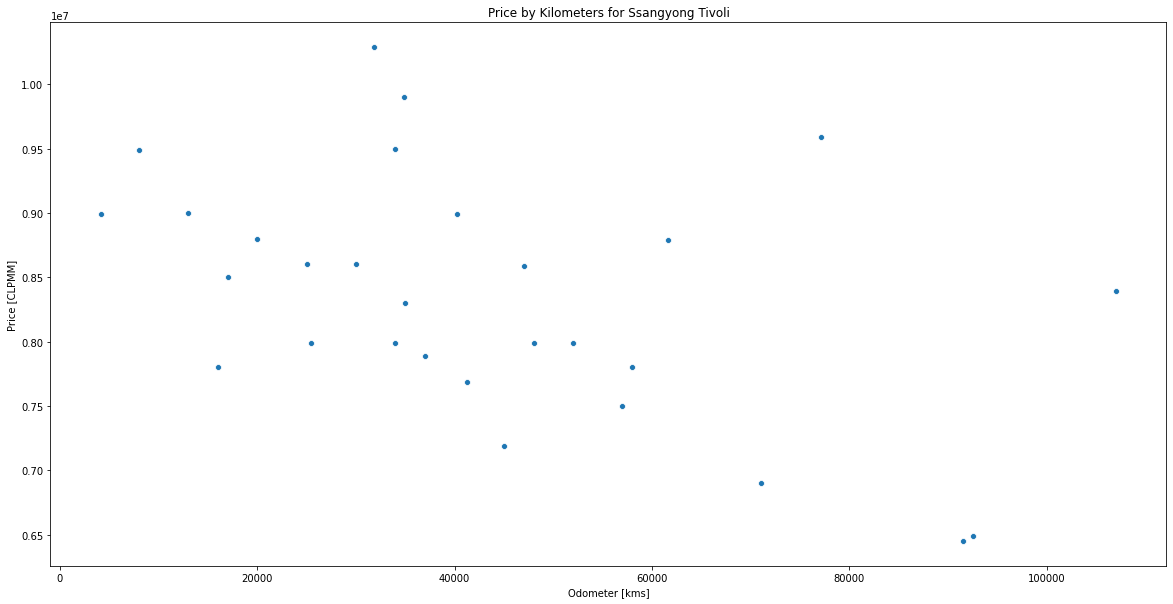

In [50]:
_ = plt.figure(figsize=(20, 10))
_ = sns.scatterplot(x=df.odometer, y=df.price)
_ = plt.xlabel("Odometer [kms]")
_ = plt.ylabel("Price [CLPMM]")
_ = plt.title('Price by Kilometers for Ssangyong Tivoli')

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.odometer, y=df.price,
                    mode='markers',
                    name='markers'))
fig.write_html('first_figure.html', auto_open=True)